# ___Text Summarization___

## ___What is Text Summarization?___

_Text Summarization looks to covert a large body of text (i.e. news article) to a few sentences without losing the key themes of the text._

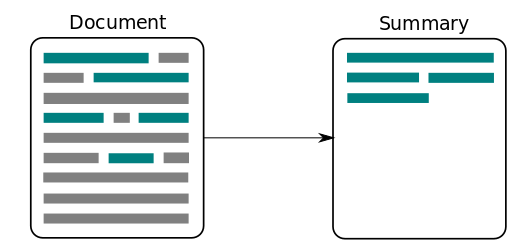

## ___Types of Text Summarization___

* ___Extractive text summarization___ _methods function by identifying the important sentences or excerpts from the text and reproducing them verbatim as part of the summary. No new text is generated; only existing text is used in the summarization process._


* ___Abstractive text summarization___ _methods employ more powerful natural language processing techniques to interpret text and generate new summary text, as opposed to selecting the most representative existing excerpts to perform the summarization._

_While both are valid approaches to text summarization, it should not be difficult to convince you that abstractive techniques are far more difficult to implement._

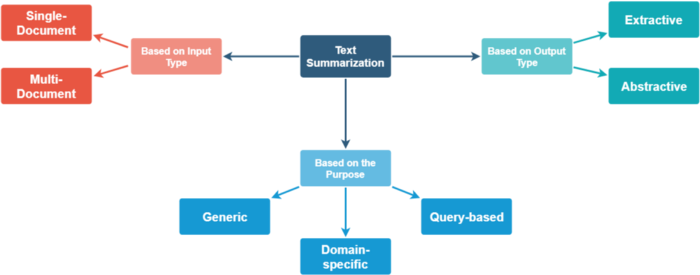

### ___Extractive Summarization___
 
_Extractive summarization techniques vary, yet they all share the same basic tasks:_

* _Construct an __intermediate representation__ of the input text (text to be summarized)_
* ___Score the sentences___ _based on the constructed intermediate representation_
* _Select a summary consisting of the __top k most important sentences___

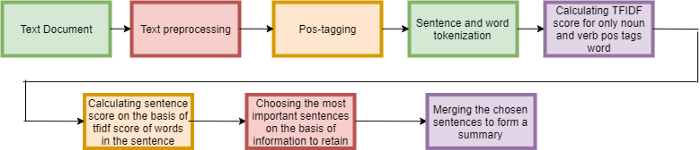

_Tasks 2 and 3 are straightforward enough; in sentence scoring, we want to determine how well each sentence relays important aspects of the text being summarized, while sentence selection is performed using some specific optimization approach. Algorithms for each of these 2 steps can vary, but they are conceptually quite simple: assign a score to each sentence using some metric, and then select from the best-scored sentences via some well-defined sentence selection method._

#### ___Intermediate Representation___

_Some sense needs to be made of natural language prior to its sentence scoring and selection, and creating some intermediate representation of each sentence serves this purpose. The 2 major categories of intermediate representation, topic representation and indicator representation, are briefly defined below, as are their sub-categories._

##### ___Topic Representation___ 
_Transformation of the text with a focus on text topic identification; major sub-categories of this approach are:_

* _frequency-driven approaches_
* _topic word approaches_
* _latent semantic analysis (LSA)_
* _Bayesian topic models — latent Dirichlet allocation (LDA), for example_

_The 2 most popular word frequency approaches are word probability and TF-IDF._

_In topic words approaches, there are 2 ways to compute a sentence's importance: by the number of topic signatures it contains (the number of topics the sentence discusses), or by the proportion of topics the sentence contains versus the number of topics contained in the text. As such, the first of these tends to reward longer sentences, while the second measures topic word density._

##### ___Indicator Representation___  
_Transformation of each sentence in the text into a list of features of importance; possible features include:_

* _sentence length_
* _sentence position_
* _whether sentence contains a particular word (see Figure 2 for an example of such a feature extraction method, bag of words)_
* _whether sentence contains a particular phrase_

_Using a set of features to represent and rank the text data can be performed using one of 2 overarching indicator representation methods: graph methods and machine learning methods._

___Using graph representations:___

* _we find that sub-graphs end up representing topics covered in the text_
* _we are able to isolate important sentences in the text, given that these are the ones which would be connected to a greater number of other sentences (if you consider sentences as vertices and sentence similarity represented by edges)_
* _we do not need to consider language-specific processing, and the same methods can be applied to a variety of languages_
* _we can often find that the semantic information gained via graph-exposed sentence similarity enhances summarization performance beyond more simple frequency approaches_

_[Reference](https://medium.com/sciforce/towards-automatic-text-summarization-extractive-methods-e8439cd54715)_

## ___Sentence Scoring based on Word Frequency___

In [ ]:
import bs4 as bs
import urllib.request
import re
import nltk
import heapq
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

In [ ]:
# Web Scraping

scraped_data = urllib.request.urlopen('https://en.wikipedia.org/wiki/Artificial_intelligence')
article = scraped_data.read()

parsed_article = bs.BeautifulSoup(article,'lxml')
paragraphs = parsed_article.find_all('p')

article_text = ""
for p in paragraphs:
    article_text += p.text

In [ ]:
# Data Cleaning

# Removing Square Brackets and Extra Spaces
article_text = re.sub(r'\[[0-9]*\]', ' ', article_text)
article_text = re.sub(r'\s+', ' ', article_text)
# Removing special characters and digits
formatted_article_text = re.sub('[^a-zA-Z]', ' ', article_text )
formatted_article_text = re.sub(r'\s+', ' ', formatted_article_text)

In [ ]:
# Removing Stopwords and counting word frequency

stopwords = nltk.corpus.stopwords.words('english')

word_frequencies = {}

for word in word_tokenize(formatted_article_text):
    if word not in stopwords:
        if word not in word_frequencies.keys():
            word_frequencies[word] = 1
        else:
            word_frequencies[word] += 1      

In [5]:
# Finally, to find the weighted frequency, we can simply divide the number of 
# occurances of all the words by the frequency of the most occurring word

max_frequency = max(word_frequencies.values())

for word in word_frequencies.keys():
    word_frequencies[word] = (word_frequencies[word]/max_frequency)

In [6]:
# Calculating Sentence Scores

sentence_list = nltk.sent_tokenize(article_text)

sentence_scores = {}
for sent in sentence_list:
    for word in nltk.word_tokenize(sent.lower()):
        if word in word_frequencies.keys():
            if len(sent.split(' ')) < 30:
                if sent not in sentence_scores.keys():
                    sentence_scores[sent] = word_frequencies[word]
                else:
                    sentence_scores[sent] += word_frequencies[word]

In [7]:
# Now we have the sentence_scores dictionary that contains sentences with their corresponding score. 
# To summarize the article, we can take top N sentences with the highest scores. 
# The following script retrieves top 7 sentences and prints them on the screen.

summary_sentences = heapq.nlargest(7, sentence_scores, key=sentence_scores.get)

summary = ' '.join(summary_sentences)
print(summary)

 Artificial intelligence (AI), sometimes called machine intelligence, is intelligence demonstrated by machines, unlike the natural intelligence displayed by humans and animals. Musk also funds companies developing artificial intelligence such as DeepMind and Vicarious to "just keep an eye on what's going on with artificial intelligence. A superintelligence, hyperintelligence, or superhuman intelligence is a hypothetical agent that would possess intelligence far surpassing that of the brightest and most gifted human mind. A February 2020 European Union white paper on artificial intelligence advocated for artificial intelligence for economic benefits, including "improving healthcare (e.g. Many of the problems in this article may also require general intelligence, if machines are to solve the problems as well as people do. The overall research goal of artificial intelligence is to create technology that allows computers and machines to function in an intelligent manner. Research in this a

## ___TextTeaser___
_TextTeaser is an automatic summarization algorithm that uses features like: title feature, sentences length, sentence position, and keyword frequency. Title feature is used to score the sentence with the regards to the title. Sentence length is scored depends on how many words are in the sentence. Sentence position is where the sentence is located. Introduction and conclusion will have higher score for this feature. Keyword frequency is just the frequency of the words used in the whole text._

In [ ]:
from textteaser import TextTeaser

# article source: https://blogs.dropbox.com/developers/2015/03/limitations-of-the-get-method-in-http/
title = "Limitations of the GET method in HTTP"
text = "We spend a lot of time thinking about web API design, and we learn a lot from other APIs and discussion with their authors. In the hopes that it helps others, we want to share some thoughts of our own. In this post, we’ll discuss the limitations of the HTTP GET method and what we decided to do about it in our own API.  As a rule, HTTP GET requests should not modify server state. This rule is useful because it lets intermediaries infer something about the request just by looking at the HTTP method.  For example, a browser doesn’t know exactly what a particular HTML form does, but if the form is submitted via HTTP GET, the browser knows it’s safe to automatically retry the submission if there’s a network error. For forms that use HTTP POST, it may not be safe to retry so the browser asks the user for confirmation first.  HTTP-based APIs take advantage of this by using GET for API calls that don’t modify server state. So if an app makes an API call using GET and the network request fails, the app’s HTTP client library might decide to retry the request. The library doesn’t need to understand the specifics of the API call.  The Dropbox API tries to use GET for calls that don’t modify server state, but unfortunately this isn’t always possible. GET requests don’t have a request body, so all parameters must appear in the URL or in a header. While the HTTP standard doesn’t define a limit for how long URLs or headers can be, most HTTP clients and servers have a practical limit somewhere between 2 kB and 8 kB.  This is rarely a problem, but we ran up against this constraint when creating the /delta API call. Though it doesn’t modify server state, its parameters are sometimes too long to fit in the URL or an HTTP header. The problem is that, in HTTP, the property of modifying server state is coupled with the property of having a request body.  We could have somehow contorted /delta to mesh better with the HTTP worldview, but there are other things to consider when designing an API, like performance, simplicity, and developer ergonomics. In the end, we decided the benefits of making /delta more HTTP-like weren’t worth the costs and just switched it to HTTP POST.  HTTP was developed for a specific hierarchical document storage and retrieval use case, so it’s no surprise that it doesn’t fit every API perfectly. Maybe we shouldn’t let HTTP’s restrictions influence our API design too much.  For example, independent of HTTP, we can have each API function define whether it modifies server state. Then, our server can accept GET requests for API functions that don’t modify server state and don’t have large parameters, but still accept POST requests to handle the general case. This way, we’re opportunistically taking advantage of HTTP without tying ourselves to it."

tt = TextTeaser()

sentences = tt.summarize(title, text)

for sentence in sentences:
    print (sentence)

## ___PyTeaser___
_PyTeaser takes any news article and extracts a brief summary from it_

_Summaries are created by ranking sentences in a news article according to how relevant they are to the entire text. The top 5 sentences are used to form a “summary”. Each sentence is ranked by using four criteria:_

* _Relevance to the title_
* _Relevance to keywords in the article_
* _The position of the sentence_
* _Length of the sentence_

In [ ]:
from pyteaser import SummarizeUrl
url = 'http://www.huffingtonpost.com/2013/11/22/twitter-forward-secrecy_n_4326599.html'
summaries = SummarizeUrl(url)
print(summaries)

## ___TextRank Algorithm___

### ___PageRank Algorithm___

_PageRank algorithm is developed by Google for searching the most importance of website so that Google search result is relevant to query._

_In PageRank, it is a directed graph. At the beginning, all node have equal score (1 / total number of node)._

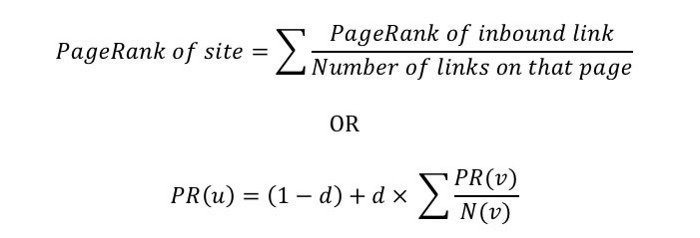

_The first formula is the simplified version of PageRank. The second one is a little bit complicated as it involved one more parameter which is damping factor, “d”. By default d is 0.85_

* _The main insight: Important pages are linked by important pages (a recurrent definition)_
* _The PageRank value of a page is essentially the probability of a user visiting that page._

_[Video Reference](https://www.youtube.com/watch?v=P8Kt6Abq_rM)_

_Suppose we have 4 web pages — w1, w2, w3, and w4. These pages contain links pointing to one another. Some pages might have no link – these are called dangling pages._
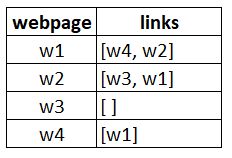 

* _Web page w1 has links directing to w2 and w4_
* _w2 has links for w3 and w1_
* _w4 has links only for the web page w1_
* _w3 has no links and hence it will be called a dangling page_
_In order to rank these pages, we would have to compute a score called the __PageRank score__. This score is the probability of a user visiting that page._

_To capture the probabilities of users navigating from one page to another, we will create a square matrix M, having n rows and n columns, where n is the number of web pages._

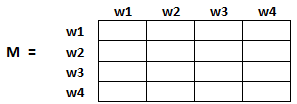
_Each element of this matrix denotes the probability of a user transitioning from one web page to another. For example, the highlighted cell below contains the probability of transition from w1 to w2._

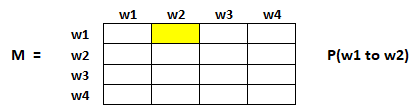

_The initialization of the probabilities is explained in the steps below:_

* _Probability of going from page i to j, i.e., M[ i ][ j ], is initialized with 1/(number of unique links in web page wi)_
* _If there is no link between the page i and j, then the probability will be initialized with 0_
* _If a user has landed on a dangling page, then it is assumed that he is equally likely to transition to any page. Hence, M[ i ][ j ] will be initialized with 1/(number of web pages)_

_Hence, in our case, the matrix M will be initialized as follows:_

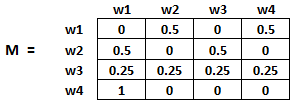

_Finally, the values in this matrix will be updated in an iterative fashion to arrive at the web page rankings._

### ___TextRank___
_Why we need to introduce PageRank before TextRank? Because the idea of TextRank comes from PageRank and using similar algorithm (graph concept) to calculate the importance._

* _In place of web pages, we use sentences_
* _Similarity between any two sentences is used as an equivalent to the web page transition probability_
* _The similarity scores are stored in a square matrix, similar to the matrix M used for PageRank_

_TextRank is an extractive and unsupervised text summarization technique._

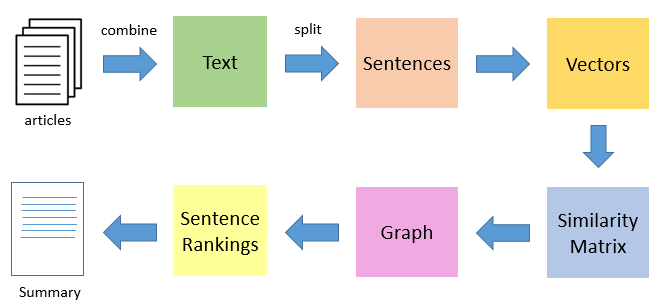

* _The first step would be to concatenate all the text contained in the articles_
* _Then split the text into individual sentences_
* _In the next step, we will find vector representation (word embeddings) for each and every sentence_
* _Similarities between sentence vectors are then calculated and stored in a matrix_
* _The similarity matrix is then converted into a graph, with sentences as vertices and similarity scores as edges, for sentence rank calculation._
* _Finally, a certain number of top-ranked sentences form the final summary_

_A widely used measure in Natural Language Processing is the __Cosine Similarity__. The Cosine Similarity computes the cosine of the angle between 2 vectors. If the vectors are identical, the cosine is 1.0. If the vectors are orthogonal, the cosine is 0.0. This means the cosine similarity is a measure we can use._

_NLTK implements __cosine_distance__, which is __1 - cosine_similarity__. The concept of distance is opposite to similarity. Two identical vectors are located at 0 distance and are 100% similar._

_[Reference](https://medium.com/@umerfarooq_26378/text-summarization-in-python-76c0a41f0dc4#:~:text=PyTeaser,-PyTeaser%20takes%20any&text=Summaries%20are%20created%20by%20ranking,to%20form%20a%20%E2%80%9Csummary%E2%80%9D.)_

_[Reference](https://iq.opengenus.org/textrank-for-text-summarization/)_

#### ___Gensim___

_Gensim Summarization algorithm uses “TextRank”, which is based on PageRank algorithm for ranking search results._

* _Pre-process the given text. This includes stop words removal, punctuation removal and stemming._
* _Make a graph with sentences are the vertices._
* _The graph has edges denoting the similarity between the two sentences at the vertices._
* _Run PageRank algorithm on this weighted graph._
* _Pick the highest scoring vertices and append them to the summary._
* _Based on the ratio or the word count, the number of vertices to be picked is decided._

_In original TextRank the weights of an edge between two sentences is the percentage of words appearing in both of them. Gensim’s TextRank uses Okapi BM25 function to see how similar the sentences are._

In [8]:
from gensim.summarization.summarizer import summarize 
from gensim.summarization import keywords 
import spacy
import wikipedia 

# Web Scraping

scraped_data = urllib.request.urlopen('https://en.wikipedia.org/wiki/Artificial_intelligence')
article = scraped_data.read()
parsed_article = bs.BeautifulSoup(article,'lxml')
paragraphs = parsed_article.find_all('p')
article_text = ""
for p in paragraphs:
    article_text += p.text

# Removing Square Brackets and Extra Spaces
article_text = re.sub(r'\[[0-9]*\]', ' ', article_text)
article_text = re.sub(r'\s+', ' ', article_text)
    
nlp = spacy.load('en_core_web_sm')
doc = nlp(article_text) 
  
# Summary (0.5% of the original content). 
summ_per = summarize(article_text, ratio = 0.05) 
print("Percent summary") 
print(summ_per) 

Percent summary
Colloquially, the term "artificial intelligence" is often used to describe machines (or computers) that mimic "cognitive" functions that humans associate with the human mind, such as "learning" and "problem solving".
Modern machine capabilities generally classified as AI include successfully understanding human speech, competing at the highest level in strategic game systems (such as chess and Go), autonomously operating cars, intelligent routing in content delivery networks, and military simulations.
"robotics" or "machine learning"), the use of particular tools ("logic" or artificial neural networks), or deep philosophical differences.
The traditional problems (or goals) of AI research include reasoning, knowledge representation, planning, learning, natural language processing, perception and the ability to move and manipulate objects.
In the twenty-first century, AI techniques have experienced a resurgence following concurrent advances in computer power, large amount

In [9]:
# Summary (200 words) 
summ_words = summarize(article_text, word_count = 200) 
print("Word count summary") 
print(summ_words) 

Word count summary
Modern machine capabilities generally classified as AI include successfully understanding human speech, competing at the highest level in strategic game systems (such as chess and Go), autonomously operating cars, intelligent routing in content delivery networks, and military simulations.
The traditional problems (or goals) of AI research include reasoning, knowledge representation, planning, learning, natural language processing, perception and the ability to move and manipulate objects.
Many researchers predict that such "narrow AI" work in different individual domains will eventually be incorporated into a machine with artificial general intelligence (AGI), combining most of the narrow skills mentioned in this article and at some point even exceeding human ability in most or all these areas.
Researchers in the 1960s and the 1970s were convinced that symbolic approaches would eventually succeed in creating a machine with artificial general intelligence and consider

#### ___PyTextRank___
_PyTextRank is a Python implementation of TextRank as a spaCy pipeline extension, used to:_

* _extract the top-ranked phrases from text documents_
* _infer links from unstructured text into structured data_
* _run extractive summarization of text documents_

_Internally PyTextRank constructs a lemma graph to represent links among the candidate phrases (e.g., unrecognized entities) and their supporting language._ 

In [ ]:
import spacy
import pytextrank

# example text
text = "Compatibility of systems of linear constraints over the set of natural numbers. Criteria of compatibility of a system of linear Diophantine equations, strict inequations, and nonstrict inequations are considered. Upper bounds for components of a minimal set of solutions and algorithms of construction of minimal generating sets of solutions for all types of systems are given. These criteria and the corresponding algorithms for constructing a minimal supporting set of solutions can be used in solving all the considered types systems and systems of mixed types."

# load a spaCy model, depending on language, scale, etc.
nlp = spacy.load("en_core_web_sm")

# add PyTextRank to the spaCy pipeline
tr = pytextrank.TextRank()
nlp.add_pipe(tr.PipelineComponent, name="textrank", last=True)

doc = nlp(text)

# examine the top-ranked phrases in the document
for p in doc._.phrases:
    print("{:.4f} {:5d}  {}".format(p.rank, p.count, p.text))
    print(p.chunks)

#### ___TextRank with WordEmbeddings___

In [10]:
import numpy as np
import pandas as pd
import re

df = pd.read_csv(r"C:\Users\PiyushSin\Data Science\NLP Use Cases\tennis_articles.csv", encoding = 'latin-1')
df.head()

,article_id,article_title,article_text,source
0,1,"I do not have friends in tennis, says Maria Sh...",Maria Sharapova has basically no friends as te...,https://www.tennisworldusa.org/tennis/news/Mar...
1,2,Federer defeats Medvedev to advance to 14th Sw...,"BASEL, Switzerland (AP)  Roger Federer advanc...",http://www.tennis.com/pro-game/2018/10/copil-s...
2,3,Tennis: Roger Federer ignored deadline set by ...,Roger Federer has revealed that organisers of ...,https://scroll.in/field/899938/tennis-roger-fe...
3,4,Nishikori to face off against Anderson in Vien...,Kei Nishikori will try to end his long losing ...,http://www.tennis.com/pro-game/2018/10/nishiko...
4,5,Roger Federer has made this huge change to ten...,"Federer, 37, first broke through on tour over ...",https://www.express.co.uk/sport/tennis/1036101...


In [11]:
df['article_text'][0]

"Maria Sharapova has basically no friends as tennis players on the WTA Tour. The Russian player has no problems in openly speaking about it and in a recent interview she said: 'I don't really hide any feelings too much. I think everyone knows this is my job here. When I'm on the courts or when I'm on the court playing, I'm a competitor and I want to beat every single person whether they're in the locker room or across the net. So I'm not the one to strike up a conversation about the weather and know that in the next few minutes I have to go and try to win a tennis match. I'm a pretty competitive girl. I say my hellos, but I'm not sending any players flowers as well. Uhm, I'm not really friendly or close to many players. I have not a lot of friends away from the courts.' When she said she is not really close to a lot of players, is that something strategic that she is doing? Is it different on the men's tour than the women's tour? 'No, not at all. I think just because you're in the same

In [12]:
from nltk.tokenize import sent_tokenize
sentences = []
for s in df['article_text']:
    sentences.append(sent_tokenize(s))

sentences = [y for x in sentences for y in x] # flatten list

In [13]:
# remove punctuations, numbers and special characters
clean_sentences = pd.Series(sentences).str.replace("[^a-zA-Z]", " ")

# make alphabets lowercase
clean_sentences = [s.lower() for s in clean_sentences]

In [14]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

# function to remove stopwords
def remove_stopwords(sen):
    sen_new = " ".join([i for i in sen if i not in stop_words])
    return sen_new

# remove stopwords from the sentences
clean_sentences = [remove_stopwords(r.split()) for r in clean_sentences]

In [15]:
#Vector Representation of Sentences 

# Extract word vectors
word_embeddings = {}
f = open(r'C:\Users\PiyushSin\Data Science\glove.6B.100d.txt', encoding='utf-8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    word_embeddings[word] = coefs
f.close()

In [16]:
sentence_vectors = []
for i in clean_sentences:
    if len(i) != 0:
        v = sum([word_embeddings.get(w, np.zeros((100,))) for w in i.split()])/(len(i.split())+0.001)
    else:
        v = np.zeros((100,))
    sentence_vectors.append(v)

___Similarity Matrix Preparation___

_The next step is to find similarities between the sentences, and we will use the cosine similarity approach for this challenge. Let’s create an empty similarity matrix for this task and populate it with cosine similarities of the sentences._

_Let’s first define a zero matrix of dimensions (n * n).  We will initialize this matrix with cosine similarity scores of the sentences. Here, n is the number of sentences._

In [17]:
# similarity matrix
sim_mat = np.zeros([len(sentences), len(sentences)])

from sklearn.metrics.pairwise import cosine_similarity

for i in range(len(sentences)):
    for j in range(len(sentences)):
        if i != j:
            sim_mat[i][j] = cosine_similarity(sentence_vectors[i].reshape(1,100), sentence_vectors[j].reshape(1,100))[0,0]

___Applying PageRank Algorithm___

_Before proceeding further, let’s convert the similarity matrix sim_mat into a graph. The nodes of this graph will represent the sentences and the edges will represent the similarity scores between the sentences. On this graph, we will apply the PageRank algorithm to arrive at the sentence rankings._

In [18]:
import networkx as nx

nx_graph = nx.from_numpy_array(sim_mat)
scores = nx.pagerank(nx_graph)

In [19]:
### Summary Extraction

ranked_sentences = sorted(((scores[i],s) for i,s in enumerate(sentences)), reverse=True)

# Extract top 10 sentences as the summary
for i in range(10):
    print(ranked_sentences[i][1])

I was on a nice trajectorythen, Reid recalled.If I hadnt got sick, I think I could have started pushing towards the second week at the slams and then who knows. Duringa comeback attempt some five years later, Reid added Bernard Tomic and 2018 US Open Federer slayer John Millman to his list of career scalps.
Major players feel that a big event in late November combined with one in January before the Australian Open will mean too much tennis and too little rest.
So I'm not the one to strike up a conversation about the weather and know that in the next few minutes I have to go and try to win a tennis match.
Speaking at the Swiss Indoors tournament where he will play in Sundays final against Romanian qualifier Marius Copil, the world number three said that given the impossibly short time frame to make a decision, he opted out of any commitment.
Currently in ninth place, Nishikori with a win could move to within 125 points of the cut for the eight-man event in London next month.
Exhau

## ___Sumy___

_Sumy is a module for automatic summarization of text documents and HTML pages. Simple library and command line utility for extracting summary from HTML pages or plain texts. The package also contains simple evaluation framework for text summaries. Implemented summarization methods:_

* ___Luhn___ _– heurestic method_
* ___Edmundson___ _heurestic method with previous statistic research_
* ___Latent Semantic Analysis (LSA)___
* ___LexRank___ _– Unsupervised approach inspired by algorithms PageRank and HITS_
* ___TextRank___
* ___SumBasic___ _– Method that is often used as a baseline in the literature_
* ___KL-Sum___ _– Method that greedily adds sentences to a summary so long as it decreases the KL Divergence._
* ___Reduction___ _- Graph-based summarization, where a sentence salience is computed as the sum of the weights of its edges to other sentences. The weight of an edge between two sentences is computed in the same manner as TextRank._

_[Reference](https://towardsdatascience.com/text-summarization-on-the-books-of-harry-potter-5e9f5bf8ca6c)_

In [ ]:
from __future__ import absolute_import
from __future__ import division, print_function, unicode_literals
 
from sumy.parsers.html import HtmlParser
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.nlp.stemmers import Stemmer
from sumy.utils import get_stop_words
 
from sumy.summarizers.lex_rank import LexRankSummarizer
from sumy.summarizers.lsa import LsaSummarizer
from sumy.summarizers.luhn import LuhnSummarizer
from sumy.summarizers.text_rank import TextRankSummarizer
from sumy.summarizers.sum_basic import SumBasicSummarizer
from sumy.summarizers.kl import KLSummarizer

LANGUAGE = "english"
SENTENCES_COUNT = 10
    
url="https://en.wikipedia.org/wiki/Deep_learning"

parser = HtmlParser.from_url(url, Tokenizer(LANGUAGE))
# or for plain text files
# parser = PlaintextParser.from_file("document.txt", Tokenizer(LANGUAGE))
# or for plain text string
# parser = PlaintextParser.from_string("string text", Tokenizer(LANGUAGE))

### ___Luhn’s Heuristic Method___

_This is one of the earliest approaches of text summarization. Luhn proposed that the significance of each word in a document signifies how important it is. The idea is that any sentence with maximum occurances of the highest frequency words(Stopwords) and least occurances are not important to the meaning of document than others. Although it is not considered very accurate approach._

_Luhn’s algorithm is an approach based on TF-IDF. It selects only the words of higher importance as per their frequency. Higher weights are assigned to the words present at the begining of the document._

_The Luhns method is most significant when:_

* _Too low frequent words are not significant_
* _Too high frequent words are also not significant (e.g. “is”, “and”)_
* _Removing low frequent words is easy - set a minimum frequency-threshold_
* _Removing common (high frequent) words - Setting a maximum frequency threshold (statistically obtained),  Comparing to a common-word list_
* _Used for summarizing technical documents._

_Luhns method is a simple technique in order to generate a summary from given words. The algorithm can be implemented in two stages._

* _In the first stage, we try to determine which words are more significant towards the meaning of document. Luhn states that this is first done by doing a frequency analysis, then finding words which are significant, but not unimportant English words._

* _In the second phase, we find out the most common words in the document, and then take a subset of those that are not these most common english words, but are still important._

_It begins with transforming the content of sentences into a mathematical expression, or vector(represented below through binary representation). Here we use a bag of words , which ignores all the filler words. Filler words are usually the supporting words that do not have any impact on our document meaning. Then we count all the valuable words left to us._ 

_Stopwords are not considered while evaluation._

_In next step we evaluate sentences using sentence scoring technique. We can use the scoring method as illustrated below._

___Score= (Number of meaningful words)2/(Span of meaningful words)$$___

_A span here refers to the part of sentence(in our case)/document consisting all the meaningful words._

_Tf-idf can also be used in order to prioritize the words in a sentence._

_Once the sentence scoring is complete, the last step is simply to select those sentences with the highest overall rankings._

In [ ]:
print ("--LuhnSummarizer--")     

summarizer = LuhnSummarizer() 
summarizer = LsaSummarizer(Stemmer(LANGUAGE))
summarizer.stop_words = ("I", "am", "the", "you", "are", "me", "is", "than", "that", "this",)

for sentence in summarizer(parser.document, SENTENCES_COUNT):
    print(sentence)

### ___TextRank Summarization___
_Text rank is a graph-based summarization technique with keyword extractions in from document._

_[Reference](https://iq.opengenus.org/textrank-for-text-summarization/)_

In [ ]:
print ("--TextRankSummarizer--")     

summarizer = TextRankSummarizer()
summarizer = TextRankSummarizer(Stemmer(LANGUAGE))
for sentence in summarizer(parser.document, SENTENCES_COUNT):
    print(sentence)

### ___LexRank Summarization___

_LexRank method for text summarization is another child method to PageRank method with a sibling TextRank. It uses a graph based approach for automatic text summarization._

_The scoring of sentences is done using the graph method. LexRank is used for computing sentence importance based on the concept of eigenvector centrality in a graph representation of sentences._

_In this model,we have a connectivity matrix based on intra-sentence cosine similarity which is used as the adjacency matrix of the graph representation of sentences. This sentence extraction majorly revolves around the set of sentences with same intend i.e. a centroid sentence is selected which works as the mean for all other sentences in the document. Then the sentences are ranked according to their similarities._

* _Based on Eigen Vector Centrality._
* _Sentences are placed at the vertexes of the Graphs_
* _The weight on the Edges are calculated using cosine similarity metric._

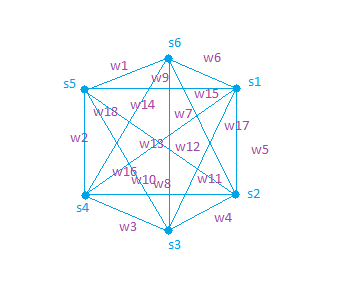

___Similarity___ _In order to Define similarity ,bag of words model is used to represent N-dimensional vectors where N is the number of all possible words in words in a particular language. For each word that occurs in a sentence, the value of the corresponding dimension in the vector representation of the sentence is the number of occurrences of the word in the sentence times the idf of the word._

___Eigen Vector Centrality___ _Each nodes contribution is calculated to determine the overall centrality. But it is not necessary that in each graphical-network all the Nodes are considered equally important. If there are unrelated documents with significantly important sentences then these sentences will get high centrality scores automatically. This situation is avoided by considering the origin nodes. Thus a simple method to calculate centrality is :_

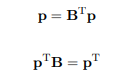

_Where matrix B is the adjancy matrix obtained from the similarity graph by dividing each element by the corresponding row sum. pT is the left eigenvector of the matrix B with the corresponding eigenvalue of 1._

In [ ]:
print ("--LexRankSummarizer--")     

summarizer = LexRankSummarizer()
summarizer = LexRankSummarizer(Stemmer(LANGUAGE))
for sentence in summarizer(parser.document, SENTENCES_COUNT):
    print(sentence)

### ___Latent Semantic Analysis Summarizer___
_Latent Semantic Analysis is a relatively new algorithm which combines term frequency with singular value decomposition._

* _It works on the principle of Term Frequency along with Singular Value Decomposition._
* _The idea is to resolve the document space to a "concept space", meaning the document is broken down into the actual underlying concept and comparisons are made within that space._
* _This is a more complicated method as compared to others._

___Discussed in detail in Topic Modelling___

In [ ]:
print ("--LsaSummarizer--")    

summarizer = LsaSummarizer()
summarizer = LsaSummarizer(Stemmer(LANGUAGE))
summarizer.stop_words = get_stop_words(LANGUAGE)

for sentence in summarizer(parser.document, SENTENCES_COUNT):
    print(sentence)

### ___SumBasic Summarization___

_SumBasic is an algorithm to generate multi-document text summaries. Basic idea is to utilize frequently occuring words in a document than the less frequent words so as to generate a summary that is more likely in human abstracts._

_It generates n length summaries, where n is user specified number of sentences._

_SumBasic has the following advantages :_

* _Used to easily understand the purpose of a document._
* _Provides greater convinience and flexibility to reader._
* _Generates shorter and concise form from multiple documents_

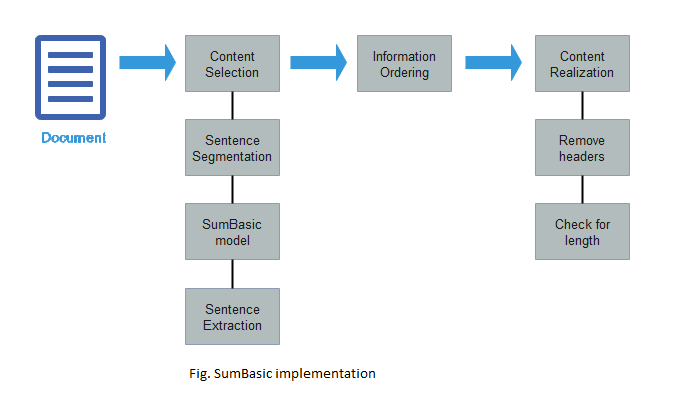

___SumBasic follows the following algorithm :___

* _It calculates the probability distribution over words w appearing in the input P(wi) for every i_

     ___p(wi)=n/N___
     
    _Where,_
    
    _n = number of times the word appeared in the input._
    
    _N = total number of content word tokens in input._


* _For sentence Sj in input, assign a weight equal to the average probability of the words in the sentence._

    ___Sj=p(wi)/|wi|___
    
    
* _Pick the best scoring sentence with highest probability word._

* _For each word wi in the sentence chosen at step 3, update their probability._

    ___pnew(wi)=pold(wi)pold(wi)___


* _If a desired summary length is not generated then repeat the step 2._

_In simple words, SumBasic first computes the probability of each content-word (i.e., verbs, nouns, adjectives and numbers) by simply counting its frequency in the document set. Each sentence is scored as the average of the probabilities of the words in it. The summary is then generated through a simple greedy search algorithm: it iteratively selects the sentence with the highest-scoring content-word, breaking ties by using the average score of the sentences. This continues until the maximum summary length has been reached._

In [ ]:
print ("--SumBasicSummarizer--")    

summarizer = SumBasicSummarizer()
summarizer = SumBasicSummarizer(Stemmer(LANGUAGE))
summarizer.stop_words = get_stop_words(LANGUAGE)

for sentence in summarizer(parser.document, SENTENCES_COUNT):
    print(sentence)

### ___Kullback-Lieber (KL) Sum Summarization___

_K-L sum algorithm (Kullback-Lieber (KL) Sum algorithm) for text summarization focuses on minimization of summary vocabulary by checking the divergence from the input vocabulary._

_It is a sentence selection algorithm where a target length for the summary is fixed (L words). It is a method that greedily adds sentences to a summary so long as it decreases the KL Divergence._

_In mathematical statistics, the Kullback-Leiber divergence (relative entropy) is a measure of how one probability distribution is different from another. Less the divergence, more the summary and the document are similar to each other in terms of understandability and meaning conveyed._

_Kullback-Leiber(KL) divergence given by:_

___Σ P(w)log P(w)/Q(w)___

_This quantity represents the divergence between true distribution P (here document set unigram) and the approximating distribution Q (the summary S distribution)._

_This summarization method finds a set of summary sentences which closely match the document set unigram distribution._

_[Reference](https://iq.opengenus.org/k-l-sum-algorithm-for-text-summarization/)_

In [ ]:
print ("--KLSummarizer--")    

summarizer = KLSummarizer()
summarizer = KLSummarizer(Stemmer(LANGUAGE))
summarizer.stop_words = get_stop_words(LANGUAGE)

for sentence in summarizer(parser.document, SENTENCES_COUNT):
    print(sentence)

## ___Evaluate Text Summarization___

### ___Rouge-N Metric___

_Rouge-N is a word N-gram measure between the model and the gold summary._

_Specifically, it is the ratio of the count of N-gram phrases which occur in both the model and gold summary, to the count of all N-gram phrases that are present in the gold summary._

_Another way to interpret it is as the recall value which measures how many N-grams from the gold summaries appeared in the model summaries._

_Generally for summarization evaluation, only ROUGE-1 and ROUGE-2 (sometimes ROUGE-3, if we have really long gold and model summaries) metrics are used, rationale being that as we increase N, we increase the length of the N-gram word phrase that needs to be matched completely in both the gold and model summary._

_As an example, consider two semantically similar phrases “apples bananas” and “bananas apples”. If we use ROUGE-1 we only consider uni-grams, which are the same for both phrases. But if we use ROUGE-2, we use 2-word phrases, so “apples bananas” become a single entity which is different from “bananas apples”, leading to a “miss” and lower evaluation score._

_Example:_

___Gold Summary___ _: A good diet must have apples and bananas._

___Model___ _: Apples and bananas are must for a good diet._

_If we use the ROUGE-1, the score is 7/8 = 0.875._

_For ROUGE-2, it is 4/7 = ~0.57._

_The above ratios can be interpreted as the amount of relevant information that our algorithm managed to extract from the set of all the relevant information, which is exactly the definition of recall, and hence Rouge is recall based._

In [ ]:
# from rouge import Rouge 
 
# hypothesis = "the #### transcript is a written version of each day 's cnn student news program use this transcript to he    lp students with reading comprehension and vocabulary use the weekly newsquiz to test your knowledge of storie s you     saw on cnn student news"
 
# reference = "this page includes the show transcript use the transcript to help students with reading comprehension and     vocabulary at the bottom of the page , comment for a chance to be mentioned on cnn student news . you must be a teac    her or a student age # # or older to request a mention on the cnn student news roll call . the weekly newsquiz tests     students ' knowledge of even ts in the news"

# rouge = Rouge()
# scores = rouge.get_scores(hypothesis, reference)

### ___BLEU(Bilingual Evaluation Understudy) Metric___
_BLEU metric is a modified form of precision, extensively used in machine translation evaluation._

_Precision is the ratio of the number of words that co-occur in both gold and model translation/summary to the number of words in the model summary. Unlike ROUGE, BLEU directly accounts for variable length phrases – unigrams, bigrams, trigrams etc., by taking a weighted average._

_The actual metric is just precision which is modified to avoid the problem when a model’s translation/summary contains repeated relevant information._

_Example:_

___Gold Summary___ _: A good diet must have apples and bananas._

___Model Summary___ _: Apples and bananas are must for a good diet._

_If we use the BLEU score considering only unigrams, i.e., weight of unigram is 1 and 0 for all other N-grams, our ratio for BLEU is calculated as 7/9 = 0.778._

_For weights [0.6, 0.4] for unigram and bigram respectively, the ratio becomes 0.6 * (7/9) + 0.4 * (4/8) = 0.667._

___The greater the ROUGE and BLEU score, the better the summary.___

In [ ]:
# import nltk

# hypothesis = ['It', 'is', 'a', 'cat', 'at', 'room']
# reference = ['It', 'is', 'a', 'cat', 'inside', 'the', 'room']

# #there may be several references

# BLEUscore = nltk.translate.bleu_score.sentence_bleu([reference], hypothesis)
# print(BLEUscore)